Function for converting a **file to a string**:

In [1]:
def openFile(name):
    with open(name, 'r') as file:
        text = file.readline()
    print("'{}' consists of {} symbols.".format(name, len(text)))
    return text

Function to **get the entropy of words**. It returs an array of Shannon entropies measured periodically in order to see how the entropy changes, after proccessing mode data from the text.

Function to **plot entropy**:

In [2]:
import matplotlib.pyplot as plt

def plotEntropy(wordEnt, charEnt, txtName):
    figure, axis = plt.subplots(1, 2)

    entType = 'word'
    axis[0].plot(list(range(len(wordEnt))), wordEnt, color='red',  marker = 'o')
    axis[0].set_title("{} entropy of '{}'".format(entType.capitalize(), txtName), fontsize = 15)
    axis[0].set_xlabel('rank', fontsize = 13)
    axis[0].set_ylabel('entropy (bits per {})'.format(entType), fontsize = 13)
    axis[0].grid(True)

    entType = 'character'
    axis[1].plot(list(range(len(charEnt))), charEnt, color='red',  marker = 'o')
    axis[1].set_title("{} entropy of '{}'".format(entType.capitalize(), txtName), fontsize = 15)
    axis[1].set_xlabel('rank', fontsize = 13)
    axis[1].set_ylabel('entropy (bits per {})'.format(entType), fontsize = 13)
    axis[1].grid(True)

    figure.set_size_inches(10,5)
    figure.savefig(txtName[:len(txtName)-4]+'.jpg')
    plt.show()

Function to **get the entropy of words**. It is limited by parameter `wordLimit` as it takes to much time for computations (proof below).

In [3]:
import math

def getWordEntropy(text, rank, wordLimit):    
    def getWord(startIndex, sizeWords):
        word = []
        for char in range(startIndex, len(text)):
            if text[char] != ' ': # if character isn't space, append it to word
                word.append(text[char])
            else:
                if word != []: # if word isn't empty
                    break
        sizeWords += 1
        word = ''.join(word)
        endIndex = char
        return word, endIndex, sizeWords
    def addToVocabulary(word, prevArr):
        if word not in vocabulary:
            vocabulary[word] = {tuple(prev): 1}
        else:
            if tuple(prev) not in vocabulary[word]:
                vocabulary[word][tuple(prev)] = 1
            else:
                vocabulary[word][tuple(prev)] += 1
    
    vocabulary = dict() #{word: {(word-n, word-n+1, ..., word-1): |occurences|, ...}, ...}
    previous = dict() #{(tuple of previous words): |occurences|, ...}
    sizeWords = 0
    prev = []
    txt = text.split()
    
    if wordLimit is None or wordLimit >= len(txt)-1:
        size = len(txt)-1
    else:
        size = wordLimit
    
    for word in range(size):
        if len(prev) != rank:
            prev.append(txt[word])
        else:
            next = txt[word+1]
            if tuple(prev) not in previous:
                previous[tuple(prev)] = 1
            else:
                previous[tuple(prev)] += 1
            addToVocabulary(next, prev)
            if prev != []:
                prev.pop(0)
                prev.append(txt[word])
    
    condEntropy = 0
    totalPrev = sum(previous[i] for i in previous)
    
    for word in vocabulary:
        for prev in previous:
            if prev in vocabulary[word]: #else joinedProb=0 -> condEntropy-=0
                prevProb = previous[prev]/totalPrev # P(Y)
                joinedProb = vocabulary[word][prev]/totalPrev # P(X, Y)
                condProb = joinedProb/prevProb # P(X|Y)
                condEntropy -= joinedProb*math.log2(condProb)
            
    return condEntropy

Function to **get the entropy of characters**.

In [4]:
def getCharacterEntropy(text, rank):
    def addToVocabulary(char, prevArr):
        if char not in vocabulary:
            vocabulary[char] = {tuple(prevArr): 1}
        else:
            if tuple(prevArr) not in vocabulary[char]:
                vocabulary[char][tuple(prevArr)] = 1
            else:
                vocabulary[char][tuple(prevArr)] += 1
    
    vocabulary = dict() #{char: {(cahr(-n), char(-n+1), ..., char(-1)): |occurences|, ...}, ...}
    previous = dict() #{(tuple of previous chars): |occurences|, ...}
    prev = []

    for index in range(len(text)-1):
        if len(prev) != rank:
            prev.append(text[index])
        else:
            char = text[index+1]
            if tuple(prev) not in previous:
                previous[tuple(prev)] = 1
            else:
                previous[tuple(prev)] += 1
            addToVocabulary(char, prev)
            if prev != []:
                prev.pop(0)

    condEntropy = 0
    totalPrev = sum(previous.values())
    
    for char in vocabulary:
        for prev in previous:
            if prev in vocabulary[char]: #else joinedProb=0 -> condEntropy-=0
                prevProb = previous[prev]/totalPrev # P(Y)
                joinedProb = vocabulary[char][prev]/totalPrev # P(X, Y)
                condProb = joinedProb/prevProb # P(X|Y)
                condEntropy -= joinedProb*math.log2(condProb)
                
    return condEntropy

Working with **English text**:

In [5]:
txtName = 'norm_wiki_en.txt'
en = openFile(txtName)

'norm_wiki_en.txt' consists of 10739877 symbols.


As in the 1st lab we calculated that on average a word conssists of ~6 letters here we would use 1/3 of all words to decrease the computation time. To process full text, set `wordLimit` to `None`

In [6]:
# Entropies of words
wordLimit = int((len(en)/6)/3)
enWordEnt = []

for rank in range(3):
    %time e = getWordEntropy(en, rank, wordLimit)
    enWordEnt.append(e)
    print("Entropy of rank {}:".format(rank), e)
    print()

Wall time: 1.15 s
Entropy of rank 0: 11.218539839742524

Wall time: 10min 28s
Entropy of rank 1: 6.221278432369669

Wall time: 34min 25s
Entropy of rank 2: 1.818357518258674



In [7]:
# Enropies of characters
enCharEnt = []

for rank in range(4): 
    %time e = getCharacterEntropy(en, rank)
    enCharEnt.append(e)
    print("Entropy of rank {}:".format(rank), e)
    print()

Wall time: 11.8 s
Entropy of rank 0: 4.288221612546937

Wall time: 11.3 s
Entropy of rank 1: 4.012420412312972

Wall time: 9.73 s
Entropy of rank 2: 3.7864951407245577

Wall time: 12 s
Entropy of rank 3: 3.435231072204562



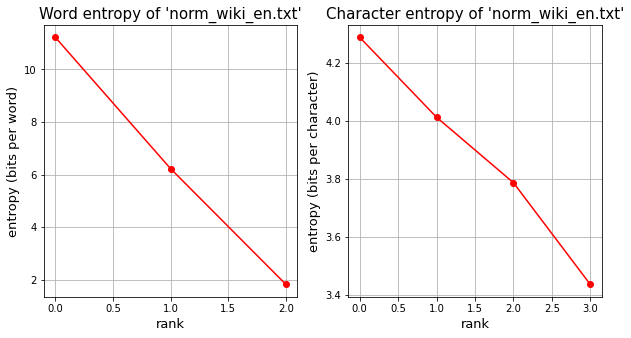

In [8]:
plotEntropy(enWordEnt, enCharEnt, txtName)

Working with **Latin text**:

In [9]:
txtName1 = 'norm_wiki_la.txt'
la = openFile(txtName1)

'norm_wiki_la.txt' consists of 15347824 symbols.


Words
Wall time: 1.16 s
Entropy of rank 0: 12.218398675259362

Wall time: 19min 51s
Entropy of rank 1: 4.738074406426011

Wall time: 57min 2s
Entropy of rank 2: 1.1472784291892413

Characters
Wall time: 19.3 s
Entropy of rank 0: 4.228247555937123

Wall time: 17.2 s
Entropy of rank 1: 3.8861146189046476

Wall time: 15.3 s
Entropy of rank 2: 3.396833121875811

Wall time: 17.2 s
Entropy of rank 3: 2.761172035448373



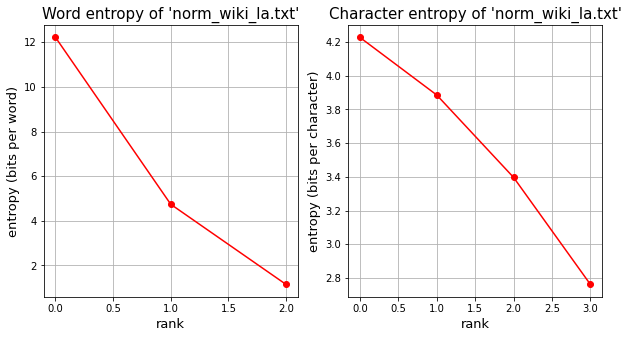

In [10]:
# Entropies of words
laWordEnt = []
print('Words')

for rank in range(3):
    %time e = getWordEntropy(la, rank, wordLimit)
    laWordEnt.append(e)
    print("Entropy of rank {}:".format(rank), e)
    print()

# Enropies of characters
laCharEnt = []
print('Characters')

for rank in range(4):
    %time e = getCharacterEntropy(la, rank)
    laCharEnt.append(e)
    print("Entropy of rank {}:".format(rank), e)
    print()
    
plotEntropy(laWordEnt, laCharEnt, txtName1)

Now analysis of the **samples**: I think, for simplicity and just to see the pattern,the `wordLimit` and `rank` for Characters  may be lowered.

'sample0.txt' consists of 6807886 symbols.


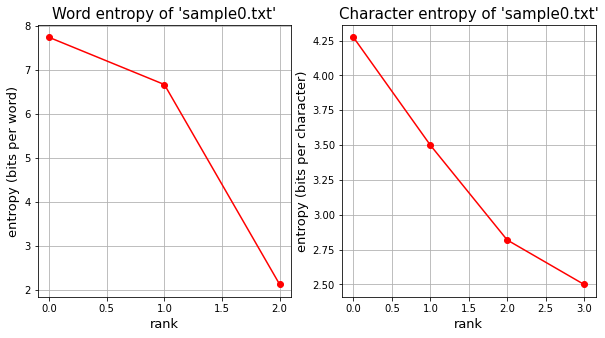

'sample1.txt' consists of 7094404 symbols.


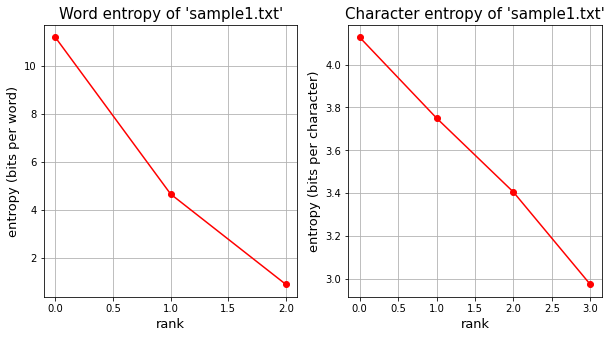

'sample2.txt' consists of 5510381 symbols.


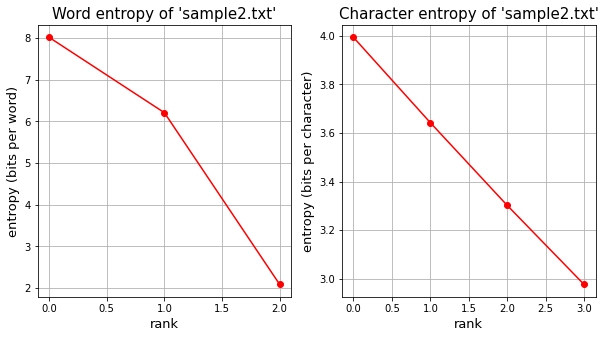

'sample3.txt' consists of 6862992 symbols.


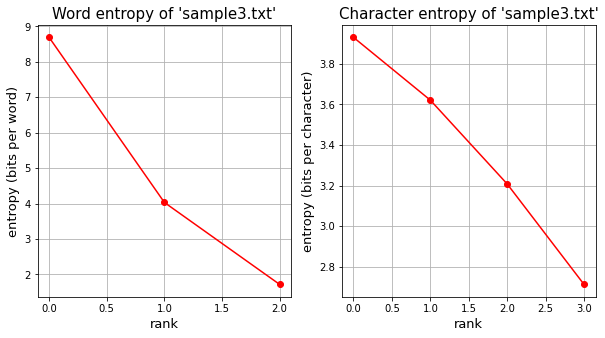

'sample4.txt' consists of 15050256 symbols.


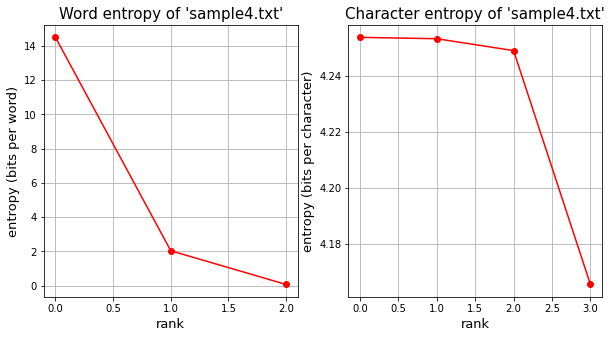

'sample5.txt' consists of 13661663 symbols.


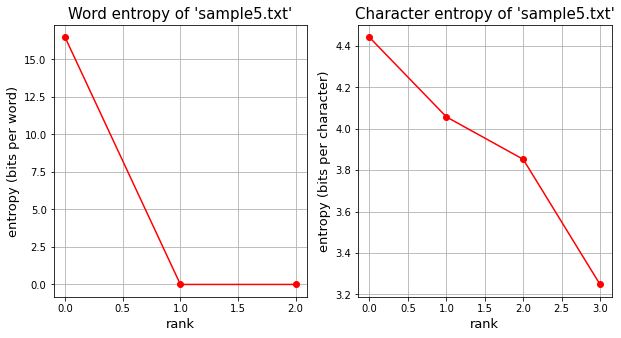

In [11]:
sampleName = []
sample = []
sampleWordEnt = []
sampleCharEnt = []
sampleWordLim = 100000

for i in range(6): # 6 samples
    sampleName.append('sample{}.txt'.format(i))
    sample.append(openFile(sampleName[i]))
    
    sampleWordEnt.append([])
    for rank in range(3): # 3 Word entropies
        e = getWordEntropy(sample[i], rank, sampleWordLim)
        sampleWordEnt[i].append(e)
        
    sampleCharEnt.append([])
    for rank in range(4): # 4 Char entropies
        e = getCharacterEntropy(sample[i], rank)
        sampleCharEnt[i].append(e)
    
    plotEntropy(sampleWordEnt[i], sampleCharEnt[i], sampleName[i])

### Conclusion: 
Comparing the entropies of confirmed natural languages with the entropies of sample, there are **4** texts which contain **non-natural languages**: **sample0**, the Word entropies go down in a convex way, unlike in natural languages, which have concave shape; **sample2**, similar story as in sample0; **sample4**, the entropies of Words collapse to 0, steep drop of Word entropies and only a small changes of Character.  and the the beahaviour of conditional entropies are strange; **sample5**, for Characters the graph seems to be okay, however, Word conditional entropies are instantly on the bottom.